## Selecting and Fitting a Model

### Question 1

Let us start by exploring the performance of a flexible statistical learning method in relation to inflexible methods.

a) The sample size n is extremely large, and the number of predictors p is small.

With more data, we would have a better fit of the data with a flexible method as opposed to an inflexible method, and our performance will be better. 


b) The number of predictors p is extremely large, and the number of observations n is small.

Because the number of observations is small, we are likely to overfit our data and our performance will be worse.


c)The relationship between the predictors and response is highly non-linear.

A flexible method would perform better because it would be better at capturing the non-linear relationship because of higher degrees of freedom.


d)The variance of the error terms is very high.

If the variance of the error terms is very high then the flexible model will perform worse becuase it would fit to the wrong or noise values in the dataset.

### Question 2 - Bias-Variance Decomposition

We've to generate graphs for typical (squared) bias, variance, training error, test error, and Bayes (irreducible) error curves, all on a single plot. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [170]:
x = np.arange(0, 2, 0.0002)
scale_factor = 1

In [182]:
test_error = scale_factor * np.power((1.8 * x / scale_factor - 1.75), 4) + 4 * scale_factor - 0.75 * x
bias_sq = scale_factor * 7 / np.exp(3 * x / scale_factor)
var = scale_factor * np.power((np.exp(x / 0.8 / scale_factor - 1.5)), 2) + 1 * scale_factor
train_error =(scale_factor * -2.7 * np.power((x / scale_factor - 1), 3)) + 2.7
bayes_error = np.full((len(x),),scale_factor * 3.1)

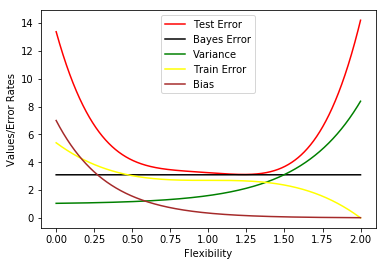

In [186]:
plt.plot(x, test_error, color="red")
plt.plot(x, bayes_error, color="black")
plt.plot(x, var, color="green")
plt.plot(x, train_error, color="yellow")
plt.plot(x, bias_sq, color="brown")
plt.xlabel("Flexibility")
plt.ylabel("Values/Error Rates")
plt.legend(['Test Error', 'Bayes Error', 'Variance', 'Train Error', 'Bias'])

Let us now discuss the nature of the graphs.

The training MSE decreases monotonically as flexibility increases, this is because the model is able to better fit the data.

The test MSE intially decreases as flexibility increases but it then levels off and starts to increase again. This is because while initially an increase in flexibility is good and reduces the error, it soon starts overfitting on the data and the test error becomes worse.

The squared bias decreases monotonically - with increasing flexibility bias decreases as the error decreases.

The variance increases monotonically - with increasing flexibility there is a chance for increasing overfitting to a dataset.

The Bayes (irreducible) error curve remains constant because whether or not a function or model is flexible it does not capture the bayes error.

NOTE: it is difficult to create the exact same functions and scale them, especially because all of these values might change if the dataset is linear, or has any other kind of particular signal.

### Question 3 - Classification

Set random seed.

In [5]:
np.random.seed(0)

Generate random uniform numbers from 1 to -1 with size 200.

In [6]:
X_1 = np.random.uniform(-1, 1, 200)
X_2 = np.random.uniform(-1, 1, 200)

Create classifier following instructions.

In [7]:
def classifier(X_1, X_2):
    mu, sigma = 0, np.sqrt(0.25)
    e = np.random.normal(mu, sigma, len(X_1))
    Y = X_1 + X_2 + np.power(X_1, 2) + np.power(X_2, 2) + e
    Y = np.exp(Y) / (np.exp(Y) + 1)
    Y = np.where(Y > 0.5, 1, 0)
    return Y

In [8]:
Y = classifier(X_1, X_2)

Create Mesh Grid for contour.

In [9]:
h = 0.2
x_min, x_max = X_1.min() - 1, X_1.max() + 1
y_min, y_max = X_2.min() - 1, X_2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [10]:
Z = classifier(xx.ravel(), yy.ravel())
Z = Z.reshape(xx.shape)

Plot the decision boundary (represented as contour), with purple dots denoting failure and yellow dots denoting success.

Text(0.5, 1.0, 'Classification and decision boundary')

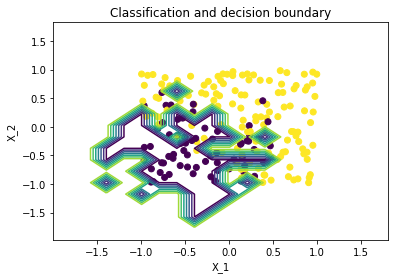

In [11]:
plt.scatter(X_1, X_2, c=Y)
plt.contour(xx, yy, Z)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.title("Classification and decision boundary")